In [806]:
import pandas as pd

data = pd.read_csv (r'/home/osboxes/Downloads/data_clear_export.csv')   
df = pd.DataFrame(data, columns= ['resto','latitude','logitude','time_completed'])

In [807]:
import numpy as np

lat_begin = data['latitude'].tolist()
lon_begin = data['logitude'].tolist()

lat_end = np.delete(lat_begin,0)
lon_end = np.delete(lon_begin,0)

resto = data['resto'].tolist()
time = data['time_completed'].tolist()

In [808]:
import osmnx as ox
city_list = ['Albi','Le Sequestre']
G = ox.graph_from_place(city_list, network_type='drive_service',simplify=True)
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
#fig, ax = ox.plot_graph(ox.project_graph(G))

In [814]:
route_liste_def = []
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

for i in range(350):
    
    origin_point = (lat_begin[i],lon_begin[i])
    destination_point = (lat_end[i],lon_end[i])
    origin_node = ox.get_nearest_node(G, origin_point)
    destination_node = ox.get_nearest_node(G, destination_point)
    
    route = ox.distance.shortest_path(G, origin_node, destination_node, weight='length')
    route_liste_def.append(route)
    
    restoprint = resto[i]
    timeprint = time[i]
print(restoprint)
print(timeprint)



Signorizza - Albi
31/3/19 19:48


In [815]:
import matplotlib.pyplot as plt
import random

number_of_colors = len(route_liste_def)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

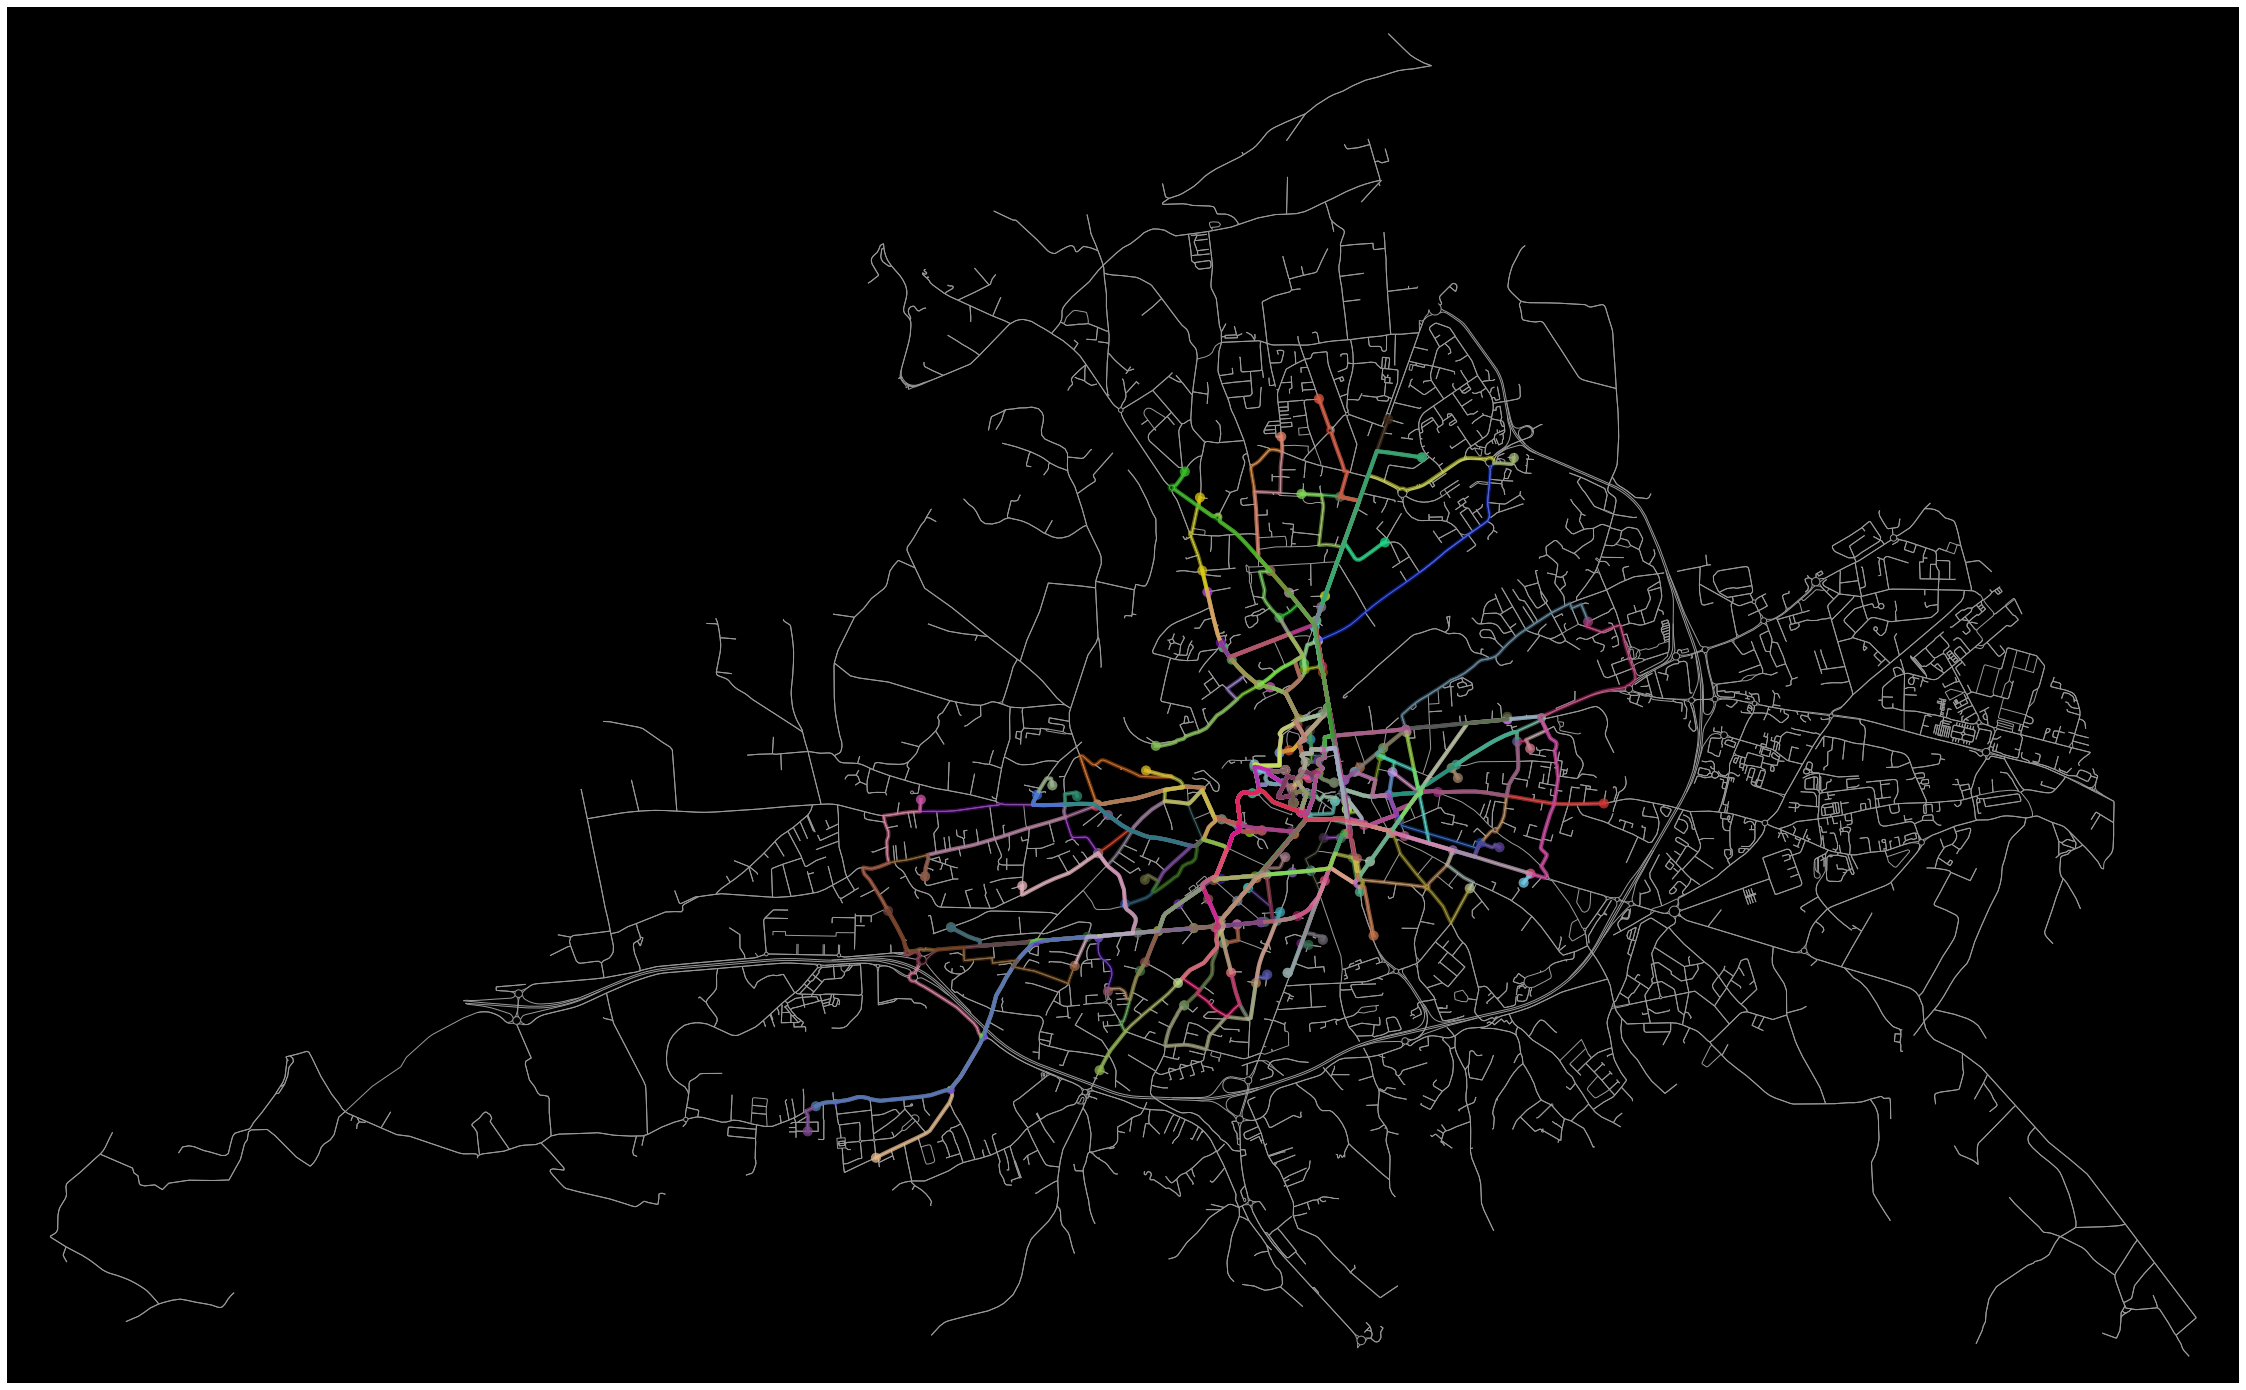

In [816]:
fig, ax = ox.plot_graph_routes(G, route_liste_def, route_colors=color, route_linewidth=6, node_size=0, bgcolor='k',figsize=(40, 40))